# Streamlines

[![Google Collab Book](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/tum-pbs/PhiFlow/blob/develop/examples/particles/Streamlines.ipynb)

This example shows how to manually trace stream lines through a vector field.

In [1]:
%pip install --quiet phiflow
from phi.jax.flow import *
# from phi.flow import *  # If JAX is not installed. You can use phi.torch or phi.tf as well.
from tqdm.notebook import trange

We start by creating a divergence-free vector field `v`.

<Figure size 288x216 with 1 Axes>

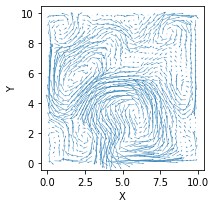

In [2]:
domain = Box(x=10, y=10)
v = StaggeredGrid(Noise(vector='x,y'), 0, domain, x=256, y=256)
v, _ = fluid.make_incompressible(v)
plot(v.at_centers().downsample(8).as_points(), size=(4, 3))

Now we can define a function that moves a point along the vector field.

In [3]:
@jit_compile
def move_along_field(x, step_size=.1):
    return advect.points(geom.Point(x), v, step_size, integrator=advect.rk4).center

Let's check whether our curve matches Matplotlib's stream plot.

c:\phd\phiflow2\phiml\phiml\math\_functional.py:252: RuntimeWarning: jit_copmile() not supported by numpy. Running function 'move_along_field' as-is.
  warnings.warn(f"jit_copmile() not supported by {key.backend}. Running function '{f_name(self.f)}' as-is.", RuntimeWarning)


<Figure size 864x360 with 2 Axes>

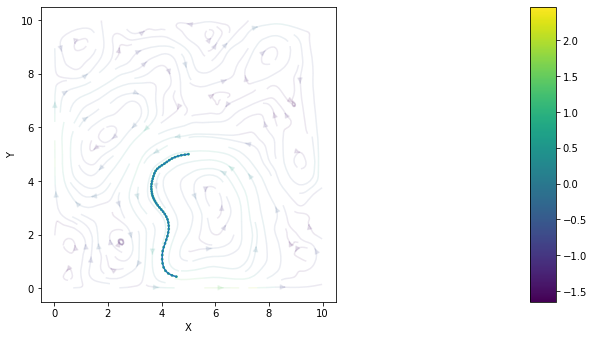

In [4]:
x0 = vec(x=5, y=5)
x_trj = iterate(move_along_field, spatial(iter=50), x0)
plot([v, x_trj], overlay='list', alpha=[.1, 1])

To get a fuller picture of the velocity field, we sample multiple trajectories, starting at equally-spaced grid points.

In [5]:
x0 = pack_dims(CenteredGrid(0, 0, domain, x=8, y=8).points, spatial, instance('start_point'))
x_trj = iterate(move_along_field, spatial(iter=50), x0)

Let's plot this and assign each line a color depending on its total length!

<Figure size 864x360 with 2 Axes>

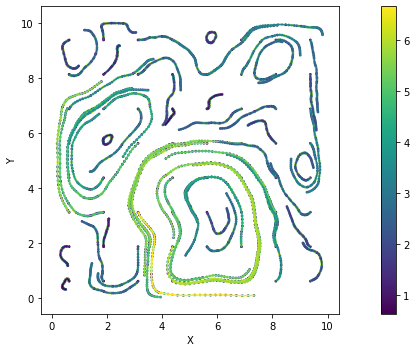

In [6]:
v = x_trj.iter[1:] - x_trj.iter[:-1]
distance = math.sum(math.vec_length(v), 'iter')
plot(x_trj, color=distance)